### Goals
* Calculate Molecule Similarities
* Use DBSCAN method to cluster
* Examine data

In [13]:
import matplotlib.pyplot as plt
import mpld3
%matplotlib inline
import seaborn as sns
sns.set_context("talk")
colors = sns.color_palette()
# sns.palplot(colors)
do_tooltips = True

import warnings
warnings.filterwarnings("ignore")


In [14]:
# import OE tools and data
import oenotebook as oenb
from openeye import oechem

,Molecule,Title,Ki (nM),IC50 (nM),PubChem SID,Target
0,,cox2_ligs.sdf_0,,0.006,104116599,Cyclooxygenase-2
1,,cox2_ligs.sdf_1,,0.02,104116624,Cyclooxygenase-2
2,,cox2_ligs.sdf_2,,0.02,104116626,Cyclooxygenase-2

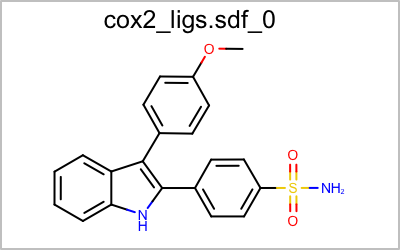
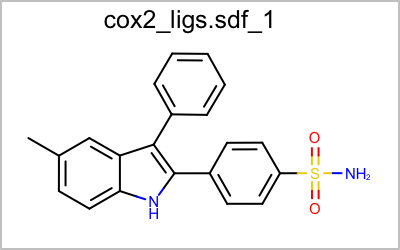
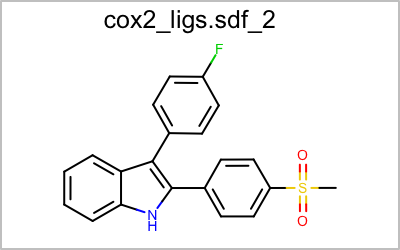

In [15]:
df = oenb.read_file_to_dataframe("./2targ_200.oeb", title_col="Title")
oenb.render_dataframe(df.head(3))

<!-- fold -->

,Molecule,Title,Ki (nM),IC50 (nM),PubChem SID,Target
197,,hsp90_ligs.sdf_114,30,,242056515,Heat Shock Protein 90 (Hsp90)
198,,hsp90_ligs.sdf_115,31,,242056505,Heat Shock Protein 90 (Hsp90)
199,,hsp90_ligs.sdf_116,34,,242056496,Heat Shock Protein 90 (Hsp90)

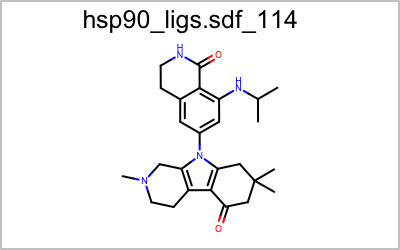
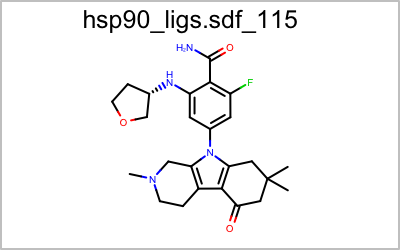
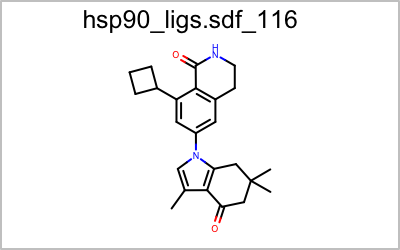

In [16]:
oenb.render_dataframe(df.tail(3))

In [17]:
from dist import CachingMolDistance, MolFPDist

In [18]:
dists = CachingMolDistance(MolFPDist)
dists.load(df.Molecule)

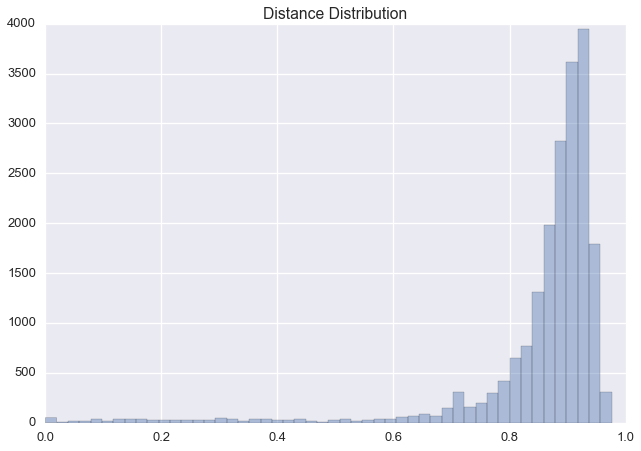

In [19]:
sns.distplot(dists.dist_vector(), kde=False)
plt.title("Distance Distribution");

## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
clus = DBSCAN(metric="precomputed")
clus.fit(dists.DistArray)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='precomputed',
    min_samples=5, p=None, random_state=None)

In [22]:
df["ClusterLabel"] = clus.labels_
df.ClusterLabel.unique()

array([ 0,  1,  2, -1,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
df.ClusterLabel.value_counts()

-1     75
 1     18
 10    16
 6     16
 2     16
 0     12
 5     10
 3      9
 7      9
 9      7
 8      6
 4      6
Name: ClusterLabel, dtype: int64

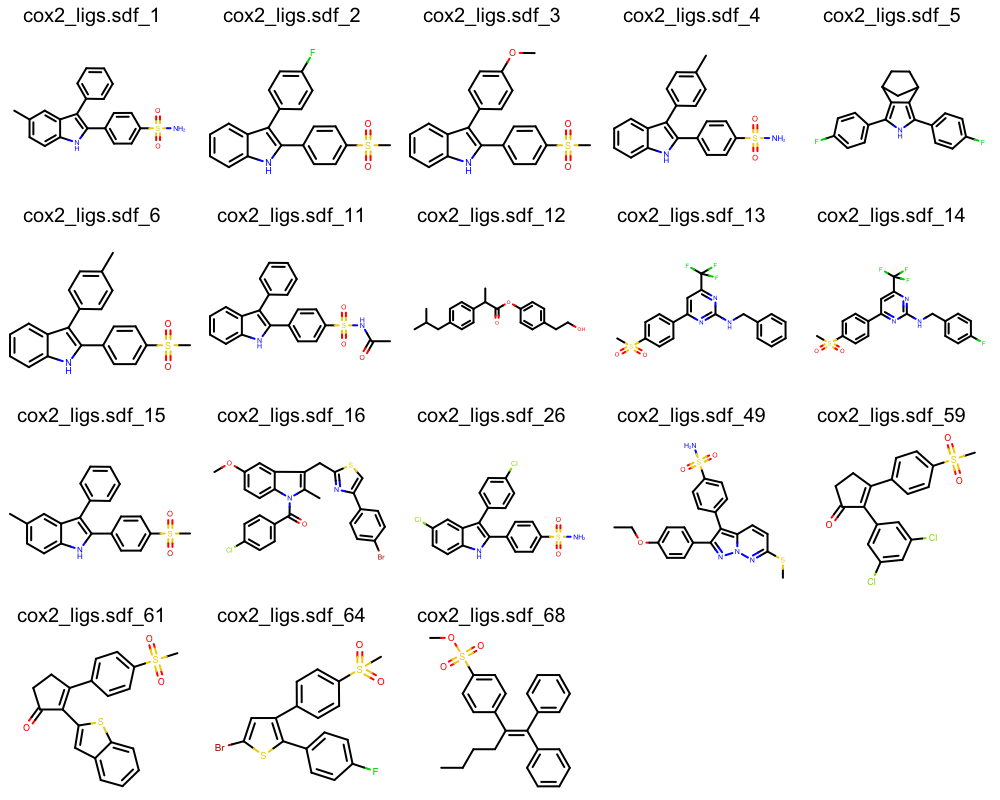

In [24]:
oenb.draw_mol_grid(df[df.ClusterLabel == 1],rows=4,cols=5)

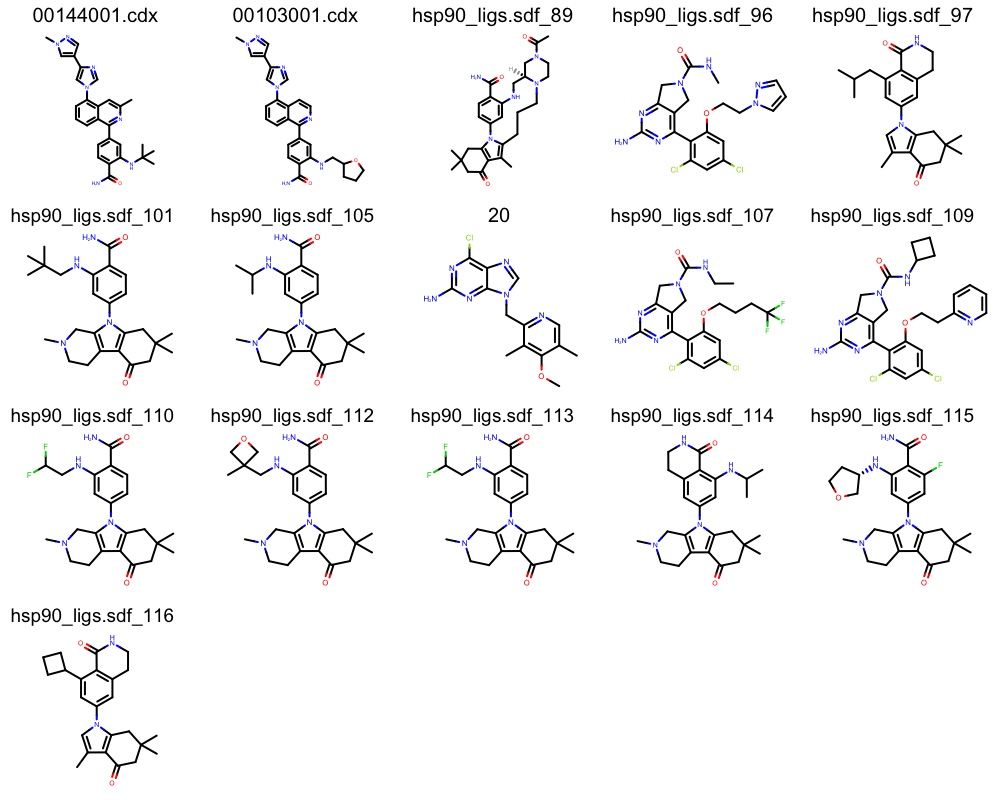

In [27]:
oenb.draw_mol_grid(df[df.ClusterLabel == 10],rows=4,cols=5)

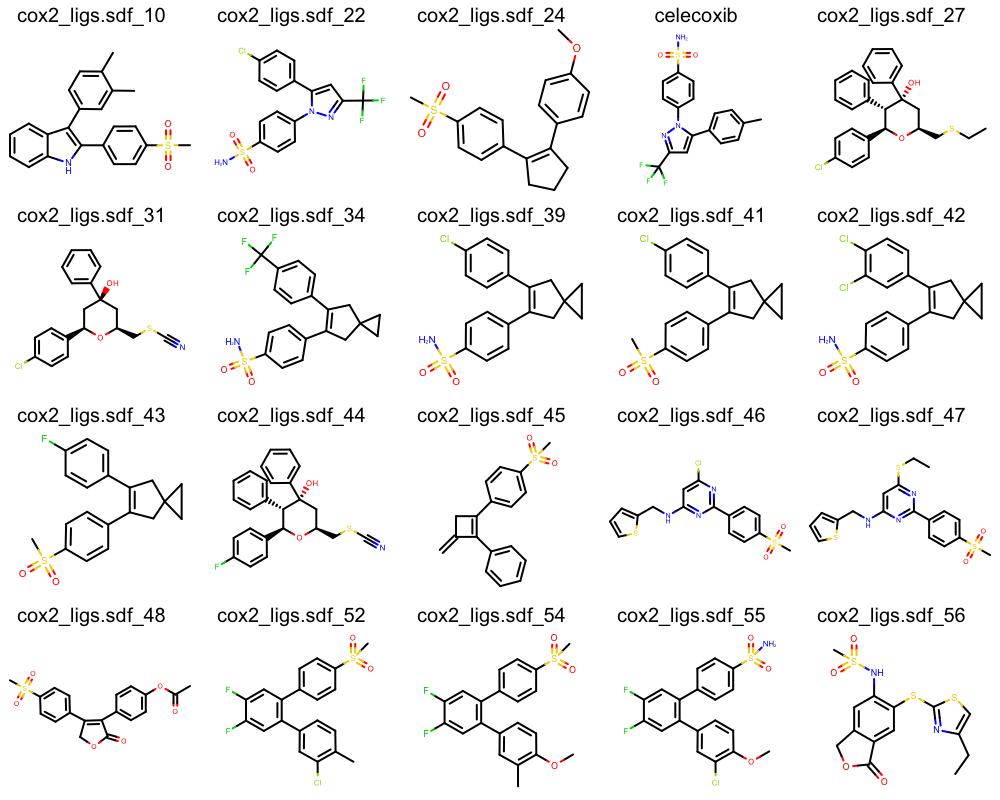

In [28]:
# Distant Points
oenb.draw_mol_grid(df[df.ClusterLabel == -1],rows=4,cols=5)